In [1]:
import numpy as np
from sklearn import svm

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
input=open("pi_data.txt","r")

X=[]
Y=[]
input.readline()
for line in input:
    row=line.strip().split("\t")
    X.append(row[2:5])
    Y.append(row[1])

X=np.array(X,dtype=float)
Y=np.array(Y,dtype=float)
print X.shape,Y.shape

(99588, 3) (99588,)


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)
print X_train.shape
print Y_train.shape

(74691, 3)
(74691,)


In [5]:
svr_rbf = svm.SVR(kernel='rbf',C=1e3)

In [6]:
svm_model=svr_rbf.fit(X_train, Y_train)

In [7]:
y_train_rbf = svm_model.predict(X_train)

In [8]:
y_test_rbf = svm_model.predict(X_test)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from scipy.stats import gaussian_kde

In [11]:
x=Y_train
y=y_train_rbf

# Calculate the point density
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

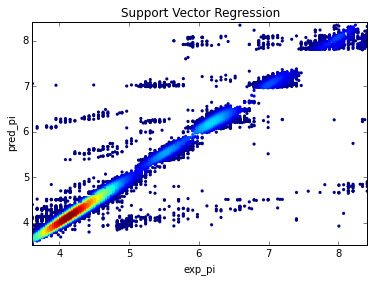

In [12]:
fig, ax = plt.subplots()  ###plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later.

ax.scatter(x, y, c=z, s=10, edgecolor='')
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
plt.xlabel('exp_pi')
plt.ylabel('pred_pi')
plt.title('Support Vector Regression')
plt.savefig("training_set_fit_goodness.png",dpi=300)
plt.show()

In [13]:
x=Y_test
y=y_test_rbf

# Calculate the point density
xy=np.vstack([x,y])
z=gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

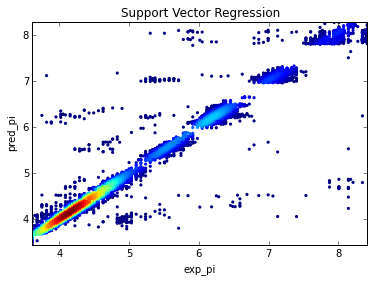

In [14]:
fig, ax = plt.subplots()  ###plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later.

ax.scatter(x, y, c=z, s=10, edgecolor='')
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
plt.xlabel('exp_pi')
plt.ylabel('pred_pi')
plt.title('Support Vector Regression')
plt.savefig("testing_set_fit_goodness.png",dpi=300)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
rmse = sqrt(mean_squared_error(Y_test, y_test_rbf))
rmse 

0.20696838140670365

In [17]:
from scipy.stats.stats import pearsonr

In [18]:
pearsonr(Y_test, y_test_rbf)

(0.98708982517414756, 0.0)